In [ ]:


# version 3 print function
from __future__ import print_function

# import math, numpy and other usefuk packages
import math
import numpy 

%matplotlib inline
# importing the required module 
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [10, 8] # for square canvas


#assembling data array
#store array where rows are data vectors [x01, x02, x03, y3]
xydata = []

xydata = [[20./20.2, 13.0/14.5, 310.8/308.0, 30.97/32.4], [20./20.2, 14.5/14.5, 308.0/308.0, 32.3/32.4]]
xydata.append([20./20.2, 15.3/14.5, 306.0/308.0, 31.5/32.4])
xydata.append([20.2/20.2, 13.0/14.5, 310.8/308.0, 30.91/32.4]) 
xydata.append([20./20.2, 14.5/14.5, 308.0/308.0, 32.5/32.4]) 
xydata.append([20./20.2, 15.3/14.5, 306.0/308.0, 31.4/32.4]) 
xydata.append([24./20.2, 13.0/14.5, 310.8/308.0, 35.59/32.4]) 
xydata.append([36./20.2, 14.5/14.5, 308.0/308.0, 46.4/32.4]) 
print (xydata)

#set starting values 
w01n =  1.23
w02n =  0.40 
w03n =  0.70
b1n =  -0.15
w12n =  0.72
b2n =  -0.12
w23n =  0.7
b3n =  0.01

#start of batch loop  

for k in range (0,150):
    icount = 0
    #initialize error and derivative parameters
    E3ti = 0.
    dE3da3 = 0.
    dE3dw01ti = 0.
    dE3dw02ti = 0.
    dE3dw03ti = 0.
    dE3db1ti = 0.
    dE3dw12ti = 0.
    dE3db2ti = 0.
    dE3dw23ti = 0.
    dE3db3ti = 0.
 
    w01 = w01n 
    w02 = w02n
    w03 = w03n
    b1 = b1n 
    w12 = w12n
    b2 = b2n 
    w23 = w23n 
    b3 = b3n 
    
    #doing calcuations for each data point 
    for i in range(0,8):
        #compute activation functions and their derivatives
        z1 = w01*xydata[i][0]+w02*xydata[i][1]+w03*xydata[i][2]+b1 
        sig1 = z1
        sigp1 = 1.0
        if z1 < 0.0:
            sig1 = math.exp(z1) - 1.0
            sigp1 = math.exp(z1)
        a1 = sig1

        z2 = w12*a1+b2 
        sig2 = z2
        sigp2 = 1.0
        if z2 < 0.0:
            sig2 = math.exp(z2) - 1.0
            sigp2 = math.exp(z2)
        a2 = sig2

        z3 = w23*a2+b3 
        sig3 = z3
        sigp3 = 1.0
        if z3 < 0.0:
            sig3 = math.exp(z3) - 1.0
            sigp3 = math.exp(z3)
        a3 = sig3
        
        
        #compute derivatives for backpropagation
        #add to sum for batch average calculation
        E3ti = E3ti +(a3 - xydata[i][3])*(a3 - xydata[i][3])
        dE3da3 = 2.*(a3 - xydata[i][3])
        
        dE3dw01ti = dE3dw01ti + dE3da3*sigp3*w23*sigp2*w12*sigp1*xydata[i][0]
        dE3dw02ti = dE3dw02ti + dE3da3*sigp3*w23*sigp2*w12*sigp1*xydata[i][1]
        dE3dw03ti = dE3dw03ti+dE3da3*sigp3*w23*sigp2*w12*sigp1*xydata[i][2]
        dE3db1ti = dE3db1ti+dE3da3*sigp3*w23*sigp2*w12*sigp1
        
        dE3dw12ti = dE3dw12ti+dE3da3*sigp3*w23*sigp2*a1
        dE3db2ti = dE3db2ti+dE3da3*sigp3*w23*sigp2
        
        dE3dw23ti = dE3dw23ti+dE3da3*sigp3*a3
        dE3db3ti = dE3db3ti+dE3da3*sigp3
        
        icount = i + 1
        # end  calculations for each data point in batch
        
    #compute batch averaged values
    E3 = E3ti/icount
    dE3dw01 = dE3dw01ti/icount
    dE3dw02 = dE3dw02ti/icount
    dE3dw03 = dE3dw03ti/icount
    dE3db1 = dE3db1ti/icount
    dE3dw12 = dE3dw12ti/icount
    dE3db2 = dE3db2ti/icount
    dE3dw23 = dE3dw23ti/icount
    dE3db3 = dE3db3ti/icount
    
    #set gam = learning rate
    '''gam = 0.05
    if E3 < 0.07: 
        gam = 0.0009'''
    gam = 0.01 ###### 0.03
    if E3 < 0.07: 
        gam = 0.005 ######0.009
    if E3 < 0.0007:
        gam = 0.0009

    w01n = w01 + gam*(-E3)/dE3dw01
    w02n = w02 + gam*(-E3)/dE3dw02
    w03n = w03 + gam*(-E3)/dE3dw03
    b1n = b1 + gam*(-E3)/dE3db1
    w12n = w12 + gam*(-E3)/dE3dw12
    b2n = b2 + gam*(-E3)/dE3db2
    
    w23n = w23 + gam*(-E3)/dE3dw23
    b3n = b3 + gam*(-E3)/dE3db3
    
    #printing for each iteration
    print ('last w01, w02, w03, w12, w23:')
    print ('last b1, b2, b3:')
    print (w01, w02, w03, w12, w23)
    print (b1, b2, b3)
    print ('E3 = ', E3, 'icount =', icount)
    print ('next ws:', w01n, w02n, w03n, w12n, w23n)
    print ('next bs:', b1n, b2n, b3n)
    
    #quit if squared error is below target
    if E3 < 0.00035:
        break
    

print ('last w01, w02, w03, w12, w23:')
print ('last b1, b2, b3:')
print (w01, w02, w03, w12, w23)
print (b1, b2, b3)
#decomment print statements below if you want to print neuron outputs
#print ('z1 =', z1)
#print ('a1 =', a1)
#print ('z2 =', z2)
#print ('a2 =', a2)
#print ('z3 =', z3)
#print ('a3 =', a3)

#print comparison of data and trained network predictions
# restore raw data values  
xydatar = [[20., 13.0, 310.8, 30.97], [20., 14.5, 308.0, 32.3]]
xydatar.append([20., 15.3, 306.0, 31.5])
xydatar.append([20.2, 13.0, 310.8, 30.91]) 
xydatar.append([20., 14.5, 308.0, 32.5]) 
xydatar.append([20., 15.3, 306.0, 31.4]) 
xydatar.append([24., 13.0, 310.8, 35.59]) 
xydatar.append([36., 14.5, 308.0, 46.4])
print ('Tdbin, Twbin, qdot, Tdbout, ypredicted:')
y_predicted=[]
for i in range(0,8): 
    z1 = w01*xydata[i][0]+w02*xydata[i][1]+w03*xydata[i][2]+b1 
    sig1 = z1
    sigp1 = 1.0
    if z1 < 0.0:
        sig1 = math.exp(z1) - 1.0
        sigp1 = math.exp(z1)
    a1 = sig1

    z2 = w12*a1+b2 
    sig2 = z2
    sigp2 = 1.0
    if z2 < 0.0:
        sig2 = math.exp(z2) - 1.0
        sigp2 = math.exp(z2)
    a2 = sig2

    z3 = w23*a2+b3 
    sig3 = z3
    sigp3 = 1.0
    if z3 < 0.0:
        sig3 = math.exp(z3) - 1.0
        sigp3 = math.exp(z3)
    a3 = sig3
    y_predicted.append(a3*32.4)

    print (xydatar[i][0], xydatar[i][1], xydatar[i][2], xydatar[i][3], a3*32.4)
    


[[0.9900990099009901, 0.896551724137931, 1.009090909090909, 0.9558641975308642], [0.9900990099009901, 1.0, 1.0, 0.9969135802469136], [0.9900990099009901, 1.0551724137931036, 0.9935064935064936, 0.9722222222222222], [1.0, 0.896551724137931, 1.009090909090909, 0.9540123456790124], [0.9900990099009901, 1.0, 1.0, 1.0030864197530864], [0.9900990099009901, 1.0551724137931036, 0.9935064935064936, 0.9691358024691358], [1.188118811881188, 0.896551724137931, 1.009090909090909, 1.098456790123457], [1.7821782178217822, 1.0, 1.0, 1.4320987654320987]]
last w01, w02, w03, w12, w23:
last b1, b2, b3:
1.23 0.4 0.7 0.72 0.7
-0.15 -0.12 0.01
E3 =  0.0023304004322608684 icount = 8
next ws: 1.2297771349304796 0.3997319576437623 0.6997372028496738 0.7199209210834812 0.6998829962853413
next bs: -0.15026308474113637 -0.12018942101361818 0.00986740529046727
last w01, w02, w03, w12, w23:
last b1, b2, b3:
1.2297771349304796 0.3997319576437623 0.6997372028496738 0.7199209210834812 0.6998829962853413
-0.15026308474

In [ ]:
import math as ma

rms=ma.sqrt(0.0003489327111315542)#the right value


print(rms)

0.018679740660179255


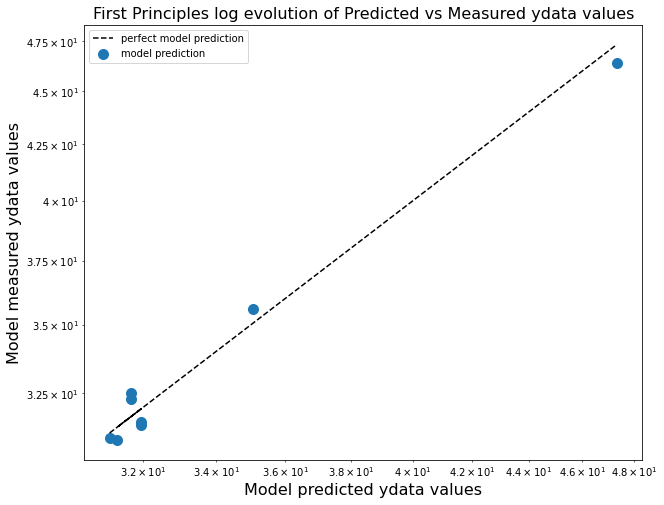

In [ ]:
import matplotlib.pyplot as plt
x=y_predicted
y=y_data
plt.scatter(x,y,s=100,label='model prediction')
plt.plot(x,x,label='perfect model prediction', color='black',linestyle='--')
plt.xlabel(r'Model predicted ydata values', fontsize=16)
plt.ylabel(r'Model measured ydata values', fontsize=16)
plt.title('First Principles log evolution of Predicted vs Measured ydata values', fontsize=16)
plt.legend(loc='upper left')
plt.grid()
plt.loglog()

plt.show()



In [ ]:
from sklearn.metrics import mean_squared_error
y1=y_predicted
y2=y_data
MSE=mean_squared_error(y2,y1)
print(y_predicted)
print(y_data)
print(MSE)


[31.139273302559985, 31.689344924049394, 31.964381116902814, 31.33478091795845, 31.689344924049394, 31.964381116902814, 35.049425610529376, 47.32995415592697]
[30.97, 32.3, 31.5, 30.91, 32.5, 31.4, 35.59, 46.4]
0.3662956028374589


In [ ]:
#Task 1.2.d

# version 3 print function
from __future__ import print_function

# import math, numpy and other usefuk packages
import math
import numpy 

%matplotlib inline
# importing the required module 
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [10, 8] # for square canvas


#assembling data array
#store array where rows are data vectors [x01, x02, x03, y3]
xydata = []

xydata = [[20./20.2, 13.0/14.5, 310.8/308.0, 30.97/32.4], [20./20.2, 14.5/14.5, 308.0/308.0, 32.3/32.4]]
xydata.append([20./20.2, 15.3/14.5, 306.0/308.0, 31.5/32.4])
xydata.append([20.2/20.2, 13.0/14.5, 310.8/308.0, 30.91/32.4]) 
xydata.append([20./20.2, 14.5/14.5, 308.0/308.0, 32.5/32.4]) 
xydata.append([20./20.2, 15.3/14.5, 306.0/308.0, 31.4/32.4]) 
xydata.append([24./20.2, 13.0/14.5, 310.8/308.0, 35.59/32.4]) 
xydata.append([36./20.2, 14.5/14.5, 308.0/308.0, 46.4/32.4]) 
print (xydata)

#set starting values 
w01n =  1.23*1.2
w02n =  0.40*1.2 
w03n =  0.70*1.2
b1n =  -0.15*1.2
w12n =  0.72*1.2
b2n =  -0.12*1.2
w23n =  0.7*1.2
b3n =  0.01*1.2

#start of batch loop  

for k in range (0,150):
    icount = 0
    #initialize error and derivative parameters
    E3ti = 0.
    dE3da3 = 0.
    dE3dw01ti = 0.
    dE3dw02ti = 0.
    dE3dw03ti = 0.
    dE3db1ti = 0.
    dE3dw12ti = 0.
    dE3db2ti = 0.
    dE3dw23ti = 0.
    dE3db3ti = 0.
 
    w01 = w01n 
    w02 = w02n
    w03 = w03n
    b1 = b1n 
    w12 = w12n
    b2 = b2n 
    w23 = w23n 
    b3 = b3n 
    
    #doing calcuations for each data point 
    for i in range(0,8):
        #compute activation functions and their derivatives
        z1 = w01*xydata[i][0]+w02*xydata[i][1]+w03*xydata[i][2]+b1 
        sig1 = z1
        sigp1 = 1.0
        if z1 < 0.0:
            sig1 = math.exp(z1) - 1.0
            sigp1 = math.exp(z1)
        a1 = sig1

        z2 = w12*a1+b2 
        sig2 = z2
        sigp2 = 1.0
        if z2 < 0.0:
            sig2 = math.exp(z2) - 1.0
            sigp2 = math.exp(z2)
        a2 = sig2

        z3 = w23*a2+b3 
        sig3 = z3
        sigp3 = 1.0
        if z3 < 0.0:
            sig3 = math.exp(z3) - 1.0
            sigp3 = math.exp(z3)
        a3 = sig3
        
        
        #compute derivatives for backpropagation
        #add to sum for batch average calculation
        E3ti = E3ti +(a3 - xydata[i][3])*(a3 - xydata[i][3])
        dE3da3 = 2.*(a3 - xydata[i][3])
        
        dE3dw01ti = dE3dw01ti + dE3da3*sigp3*w23*sigp2*w12*sigp1*xydata[i][0]
        dE3dw02ti = dE3dw02ti + dE3da3*sigp3*w23*sigp2*w12*sigp1*xydata[i][1]
        dE3dw03ti = dE3dw03ti+dE3da3*sigp3*w23*sigp2*w12*sigp1*xydata[i][2]
        dE3db1ti = dE3db1ti+dE3da3*sigp3*w23*sigp2*w12*sigp1
        
        dE3dw12ti = dE3dw12ti+dE3da3*sigp3*w23*sigp2*a1
        dE3db2ti = dE3db2ti+dE3da3*sigp3*w23*sigp2
        
        dE3dw23ti = dE3dw23ti+dE3da3*sigp3*a3
        dE3db3ti = dE3db3ti+dE3da3*sigp3
        
        icount = i + 1
        # end  calculations for each data point in batch
        
    #compute batch averaged values
    E3 = E3ti/icount
    dE3dw01 = dE3dw01ti/icount
    dE3dw02 = dE3dw02ti/icount
    dE3dw03 = dE3dw03ti/icount
    dE3db1 = dE3db1ti/icount
    dE3dw12 = dE3dw12ti/icount
    dE3db2 = dE3db2ti/icount
    dE3dw23 = dE3dw23ti/icount
    dE3db3 = dE3db3ti/icount
    
    #set gam = learning rate
    '''gam = 0.05
    if E3 < 0.07: 
        gam = 0.0009'''
    gam = 0.01 ###### 0.03
    if E3 < 0.07: 
        gam = 0.005 ######0.009
    if E3 < 0.0007:
        gam = 0.0009

    w01n = w01 + gam*(-E3)/dE3dw01
    w02n = w02 + gam*(-E3)/dE3dw02
    w03n = w03 + gam*(-E3)/dE3dw03
    b1n = b1 + gam*(-E3)/dE3db1
    w12n = w12 + gam*(-E3)/dE3dw12
    b2n = b2 + gam*(-E3)/dE3db2
    
    w23n = w23 + gam*(-E3)/dE3dw23
    b3n = b3 + gam*(-E3)/dE3db3
    
    #printing for each iteration
    print ('last w01, w02, w03, w12, w23:')
    print ('last b1, b2, b3:')
    print (w01, w02, w03, w12, w23)
    print (b1, b2, b3)
    print ('E3 = ', E3, 'icount =', icount)
    print ('next ws:', w01n, w02n, w03n, w12n, w23n)
    print ('next bs:', b1n, b2n, b3n)
    
    #quit if squared error is below target
    if E3 < 0.00035:
        break
    

print ('last w01, w02, w03, w12, w23:')
print ('last b1, b2, b3:')
print (w01, w02, w03, w12, w23)
print (b1, b2, b3)
#decomment print statements below if you want to print neuron outputs
#print ('z1 =', z1)
#print ('a1 =', a1)
#print ('z2 =', z2)
#print ('a2 =', a2)
#print ('z3 =', z3)
#print ('a3 =', a3)

#print comparison of data and trained network predictions
# restore raw data values  
xydatar = [[20., 13.0, 310.8, 30.97], [20., 14.5, 308.0, 32.3]]
xydatar.append([20., 15.3, 306.0, 31.5])
xydatar.append([20.2, 13.0, 310.8, 30.91]) 
xydatar.append([20., 14.5, 308.0, 32.5]) 
xydatar.append([20., 15.3, 306.0, 31.4]) 
xydatar.append([24., 13.0, 310.8, 35.59]) 
xydatar.append([36., 14.5, 308.0, 46.4])
print ('Tdbin, Twbin, qdot, Tdbout, ypredicted:')
y_predicted=[]
for i in range(0,8): 
    z1 = w01*xydata[i][0]+w02*xydata[i][1]+w03*xydata[i][2]+b1 
    sig1 = z1
    sigp1 = 1.0
    if z1 < 0.0:
        sig1 = math.exp(z1) - 1.0
        sigp1 = math.exp(z1)
    a1 = sig1

    z2 = w12*a1+b2 
    sig2 = z2
    sigp2 = 1.0
    if z2 < 0.0:
        sig2 = math.exp(z2) - 1.0
        sigp2 = math.exp(z2)
    a2 = sig2

    z3 = w23*a2+b3 
    sig3 = z3
    sigp3 = 1.0
    if z3 < 0.0:
        sig3 = math.exp(z3) - 1.0
        sigp3 = math.exp(z3)
    a3 = sig3
    y_predicted.append(a3*32.4)

    print (xydatar[i][0], xydatar[i][1], xydatar[i][2], xydatar[i][3], a3*32.4)
    




[[0.9900990099009901, 0.896551724137931, 1.009090909090909, 0.9558641975308642], [0.9900990099009901, 1.0, 1.0, 0.9969135802469136], [0.9900990099009901, 1.0551724137931036, 0.9935064935064936, 0.9722222222222222], [1.0, 0.896551724137931, 1.009090909090909, 0.9540123456790124], [0.9900990099009901, 1.0, 1.0, 1.0030864197530864], [0.9900990099009901, 1.0551724137931036, 0.9935064935064936, 0.9691358024691358], [1.188118811881188, 0.896551724137931, 1.009090909090909, 1.098456790123457], [1.7821782178217822, 1.0, 1.0, 1.4320987654320987]]
last w01, w02, w03, w12, w23:
last b1, b2, b3:
1.476 0.48 0.84 0.864 0.84
-0.18 -0.144 0.012
E3 =  0.7524187529130215 icount = 8
next ws: 1.4707628436855689 0.4738078222585676 0.833965743538556 0.8621569009083427 0.8377474327292627
next bs: -0.18604451835229519 -0.14922246385638302 0.00761313036063825
last w01, w02, w03, w12, w23:
last b1, b2, b3:
1.4707628436855689 0.4738078222585676 0.833965743538556 0.8621569009083427 0.8377474327292627
-0.186044518